<h1>Introduction to Deep Learning - HW2</h1>

<h6>Emirhan ÇETİNTÜRK - 152120201124</h3>

**Gerekli kütüphanelerin kurulumu**

In [1]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
from PIL import Image

**Görsel yükleniyor. Ekrana boyutları ile birlikte bastırılıyor.**

(384, 512, 3)


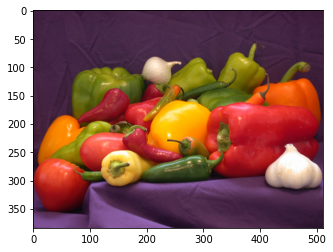

In [2]:
Image1 = plt.imread('/content/peppers.png')
print(Image1.shape)
imgplot = plt.imshow(Image1)
plt.show()

**Görsele noise fonksiyonu uygulanıyor. Bu fonksiyon ile görsel üzerinde salt&pepper görünümü ortaya çıkıyor. Görsel ekrana title ile birlikte bastırılıyor.**

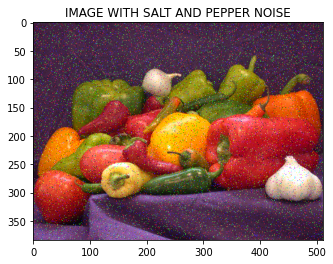

In [3]:
from skimage.util import random_noise
Image1wSaltnPepper = random_noise(Image1, mode='s&p', seed=None, clip=True)
imgplot = plt.imshow(Image1wSaltnPepper)
plt.title('IMAGE WITH SALT AND PEPPER NOISE')
plt.show()

**Görsel üzerine 3x3 boyutunda çerçeve tanımlanıyor ve görsel dizisinin (array) etrafı sıfırlar ile dolduruluyor. Daha sonrasında medyan değeri elde ediliyor. Son olarak R-G-B değerleri sırasıyla travers (sıralı geçiş) ediliyor. Bu işlem yaklaşık 20 ile 25 saniye arası sürüyor. Son olarak görselin son hali ekrana bastırılıyor.**

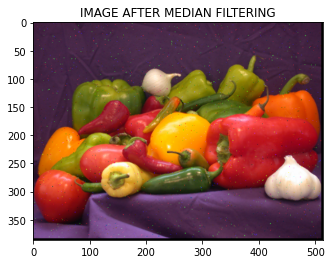

In [4]:
#DEFINE THE WINDOW SIZE MXN
M=3;
N=3;

ModifiedImage1 = np.pad(Image1wSaltnPepper, [(math.floor(M / 2) , math.floor(M / 2)), (math.floor(N / 2) , math.floor(N / 2)), (0,0)], 'constant')

MedianIndex = round((M*N)/2); #MEDIAN INDEX
FinalImage1 = np.zeros([ModifiedImage1.shape[0], ModifiedImage1.shape[1], ModifiedImage1.shape[2]])

for i in range ((ModifiedImage1.shape[0])-(M-1)-1):
  for q in range ( (ModifiedImage1.shape[1] - (N-1) - 1)):
    temp = ModifiedImage1[i:i + (M-1), q:q + (N - 1), :]
    for w in range(3):
      temp_2 = temp[:, :, w]
      FinalImage1[i, q, w] = np.median(temp_2[:])

plt.imshow(FinalImage1)
plt.title('IMAGE AFTER MEDIAN FILTERING');

**Son olarak ekrana peppers görselinin ilk hali ve median filtering sonrasında elde edilen görselin uint8 formatına çevirilmiş hali ekrana bastırılıyor.**

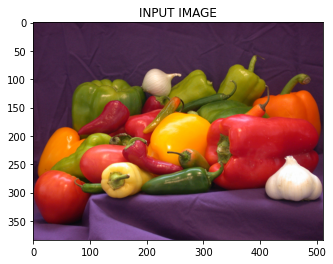

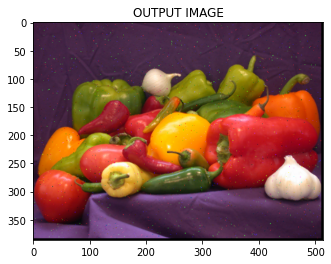

In [5]:
plt.imshow(Image1);
plt.title('INPUT IMAGE');
plt.figure()
plt.imshow((FinalImage1 * 255).astype(np.uint8));
plt.title('OUTPUT IMAGE');